## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import warnings
warnings.filterwarnings('ignore')

## File Loading

In [2]:
current_dir = os.getcwd()

# Go up two levels to reach the project root
project_root = os.path.abspath(os.path.join(current_dir, "../.."))

#  raw data path
data = os.path.join(project_root, "data")
excel_file = os.path.join(data, "INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")
df = pd.read_excel(excel_file) 

## EDA

In [3]:
df.info()                                                                                         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [4]:
print(f"Dataset Shape: {df.shape}")
print(f"Performance Rating Distribution:\n{df['PerformanceRating'].value_counts().sort_index()}")

Dataset Shape: (1200, 28)
Performance Rating Distribution:
PerformanceRating
2    194
3    874
4    132
Name: count, dtype: int64


## Dataset Overview
- **Shape**: 1200 employees, 28 features
- **Performance Rating Distribution**: Highly imbalanced (73% rated 3, 11% rated 4, 16% rated 2)

In [5]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [6]:
num_data = df[['Age','DistanceFromHome','EmpHourlyRate','NumCompaniesWorked','EmpLastSalaryHikePercent',
               'TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
                    'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

cat_data = df.drop(num_data,axis=1)

### Distribution of Numerical columns

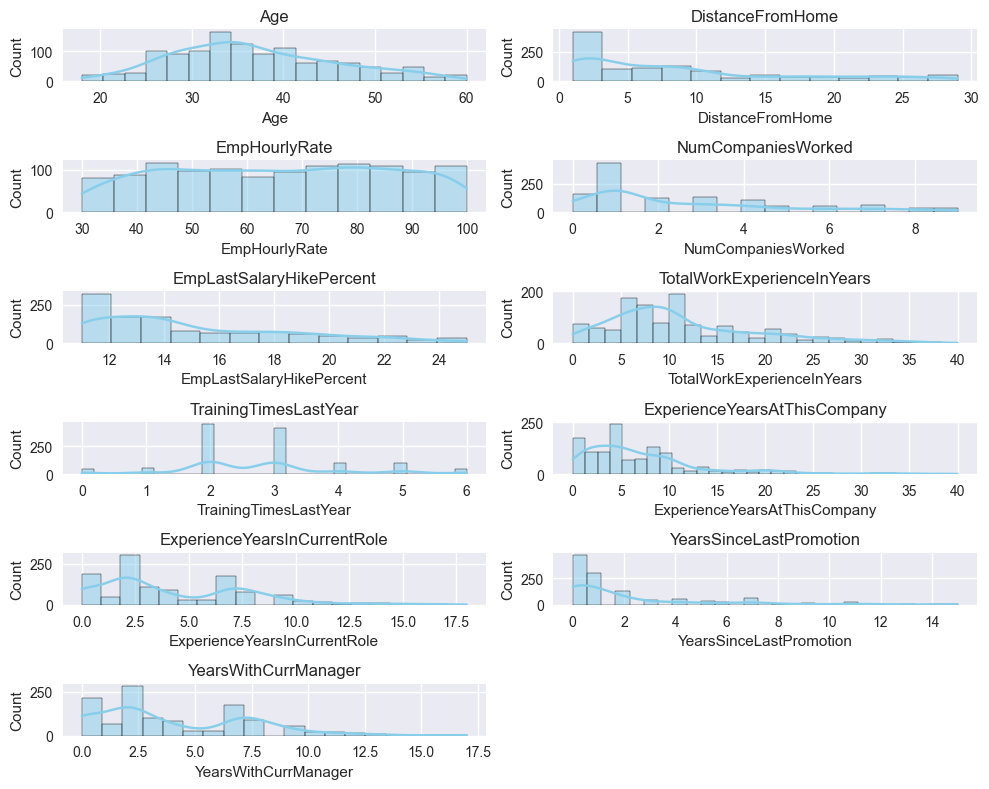

In [7]:
plt.figure(figsize=(10, 8))
plot = 1

for col in num_data.columns:
    plt.subplot(6, 2, plot)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(col)
    plot += 1

plt.tight_layout()
plt.show()

## Numerical Variables Distribution
- **Age**: Approximately normal distribution, majority employees aged 30-45
- **DistanceFromHome**: Right-skewed, most employees live close to workplace
- **EmpHourlyRate**: Multi-modal distribution, suggesting different pay grades/levels
- **NumCompaniesWorked**: Right-skewed, most employees worked at 1-2 companies previously
- **EmpLastSalaryHikePercent**: Concentrated around 10-15% range
- **TotalWorkExperienceInYears**: Right-skewed, mix of junior and experienced employees
- **TrainingTimesLastYear**: Most employees received 2-3 trainings annually
- **ExperienceYearsAtThisCompany**: Right-skewed, many long-tenured employees
- **ExperienceYearsInCurrentRole**: Most in current role 2-4 years
- **YearsSinceLastPromotion**: Right-skewed, many haven't been promoted recently
- **YearsWithCurrManager**: Varied distribution, suggesting frequent manager changes


### Distribution of Categorical columns

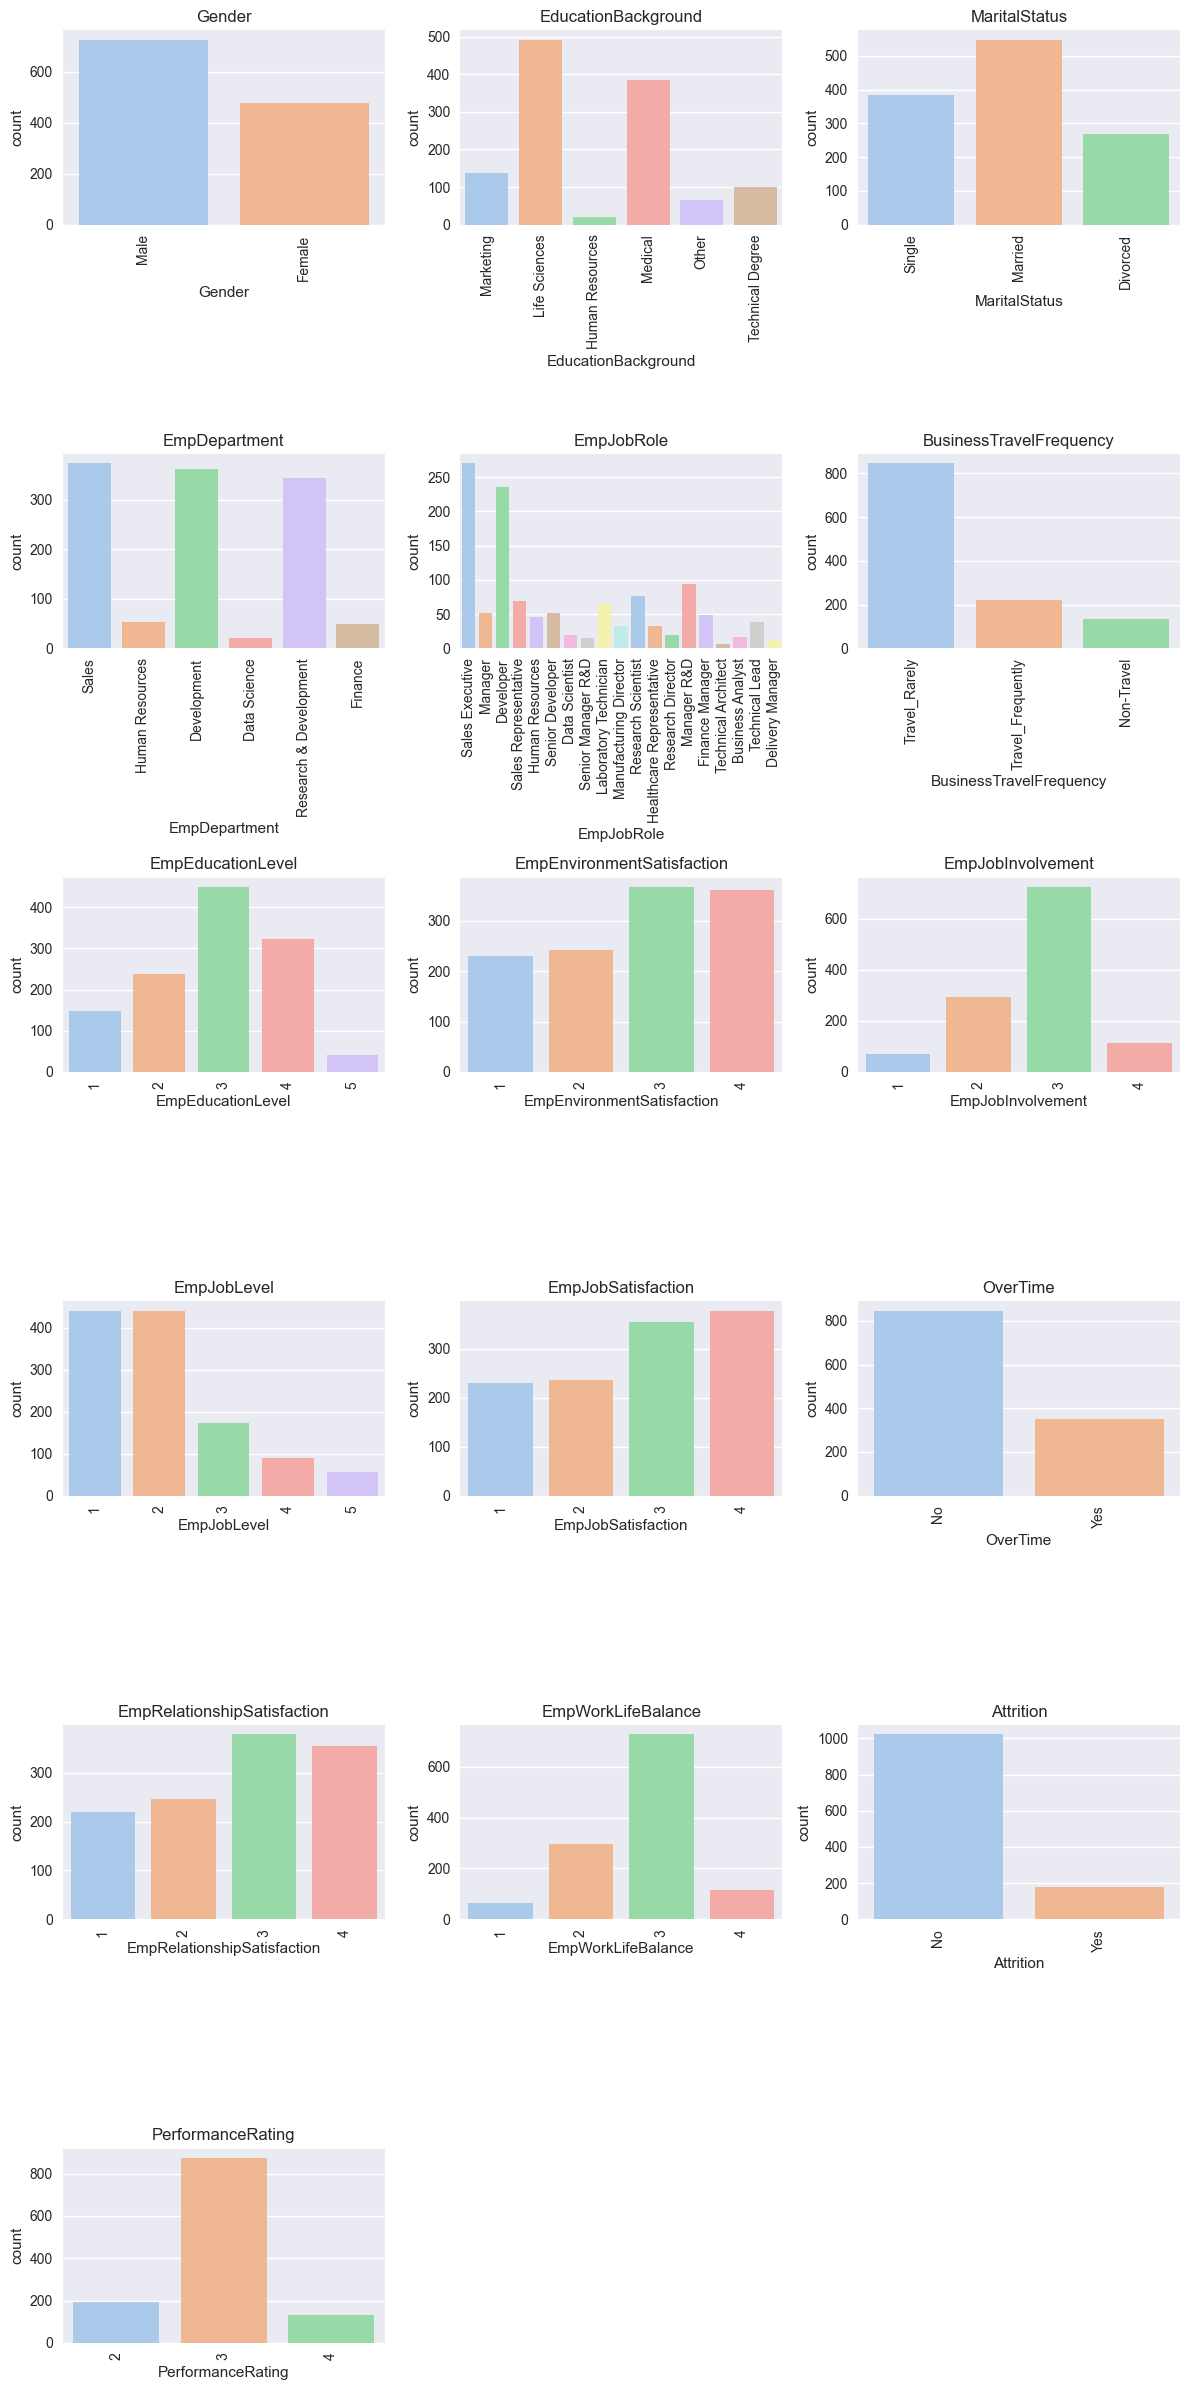

In [8]:
cat_data = cat_data.drop(columns=['EmpNumber'], axis=1)

plt.figure(figsize=(12, 24))
plot = 1

for col in cat_data.columns:
    plt.subplot(6, 3, plot)
    sns.countplot(x=df[col], palette='pastel')
    plt.title(col)
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(fontsize=10)
    plot += 1

plt.tight_layout()
plt.show()

## Categorical Variables Analysis
- **Gender**: Male-dominated workforce
- **EducationBackground**: Life Sciences and Medical backgrounds dominate
- **MaritalStatus**: Married employees form majority
- **EmpDepartment**: Sales, R&D, and HR are main departments
- **BusinessTravelFrequency**: Most travel rarely or occasionally
- **OverTime**: Significant portion works overtime
- **Attrition**: Low attrition rate (imbalanced dataset)

### Performance Rating Distribution

Text(0.5, 1.0, 'Employee Performance Rating Distribution')

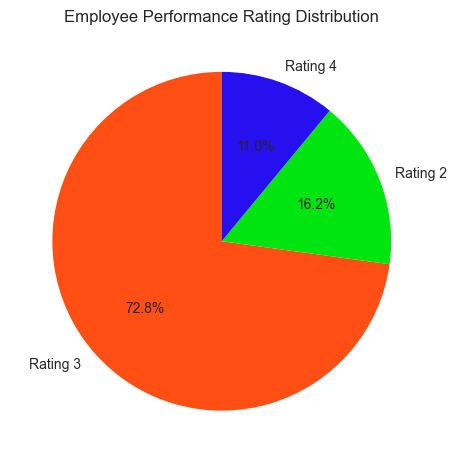

In [9]:
performance_counts = df['PerformanceRating'].value_counts()
colors = [ "#ff4f14", "#00e50f","#2710ef"]
plt.pie(performance_counts.values, labels=['Rating 3', 'Rating 2', 'Rating 4'], 
        autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Employee Performance Rating Distribution')

###  Employee Performance Rating Distribution

- The pie chart shows that a majority of employees (about **73%**) have a **Performance Rating of 3**, indicating average performance across the organization.
- Around **16%** of employees are rated **2**, reflecting below-average performers who may need improvement, while only **11%** achieved a **Rating of 4**, representing high performers.  



### Outlier detection

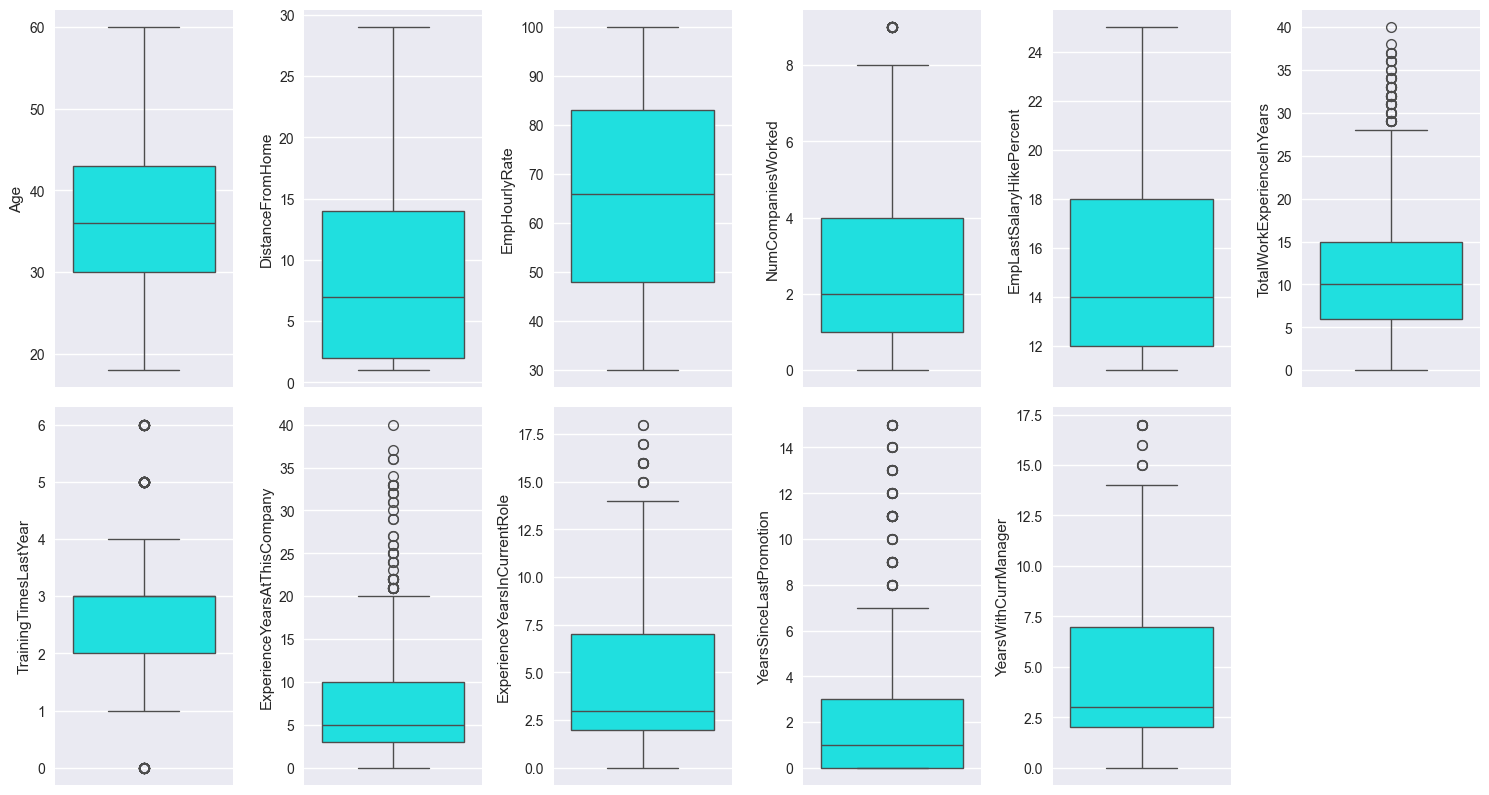

In [10]:
plt.figure(figsize=(15,20))                
plotnumber = 1
for i in num_data :
    plt.subplot(5,6,plotnumber)
    sns.boxplot(df[i],color='cyan')
    plotnumber = plotnumber + 1
plt.tight_layout()
plt.show()

### Outlier Insights from Boxplots

- **Age**: Few outliers among very young (<20) employees.  
- **DistanceFromHome**: Some employees live unusually far (>25 km).  
- **EmpHourlyRate**: Minimal outliers; distribution fairly consistent.  
- **NumCompaniesWorked**: Noticeable outliers beyond 8 companies.  
- **EmpLastSalaryHikePercent**: Few outliers with exceptionally high hike (>22%).  
- **TotalWorkExperienceInYears**: Strong outliers beyond 30 years of experience.  
- **TrainingTimesLastYear**: Minor outliers with 5–6 training sessions.  
- **ExperienceYearsAtThisCompany**: Several outliers with tenure >25–30 years.  
- **ExperienceYearsInCurrentRole**: Outliers with 15–18 years in the same role.  
- **YearsSinceLastPromotion**: Many outliers beyond 10 years without promotion.  
- **YearsWithCurrManager**: Outliers visible for employees with >14 years under same manager.


### **DEPARTMENT-WISE PERFORMANCE ANALYSIS**

#### Average Performance by Department

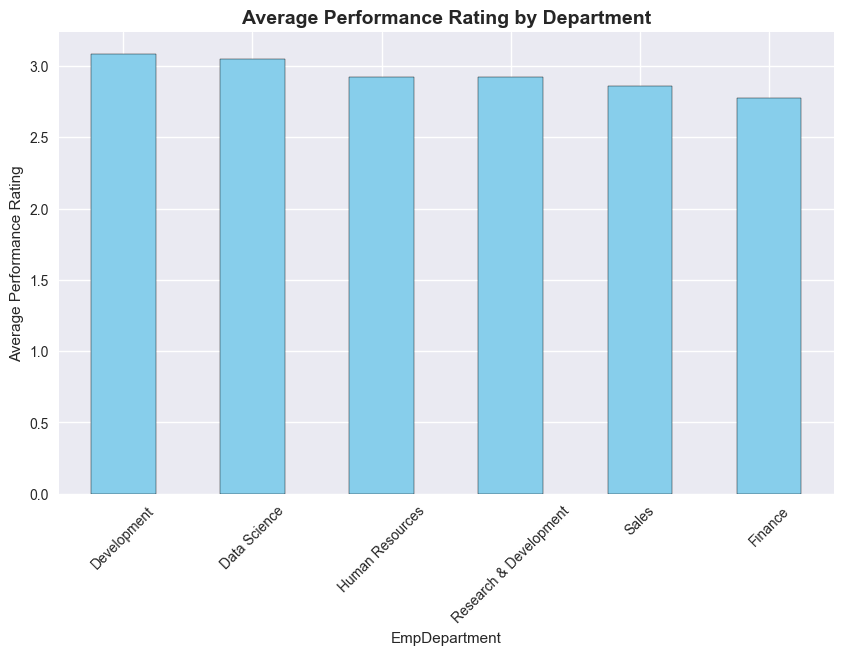

In [11]:
dept_performance = df.groupby('EmpDepartment')['PerformanceRating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
dept_performance.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Performance Rating by Department', fontsize=14, fontweight='bold')
plt.ylabel('Average Performance Rating')
plt.xticks(rotation=45)
plt.show()

#### Employee Count by Department

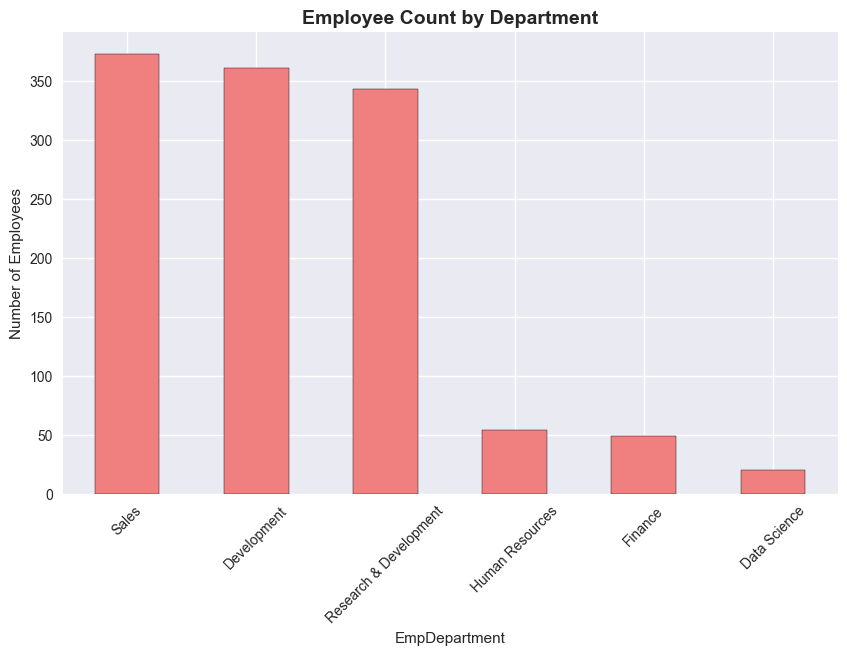

In [12]:
dept_count = df['EmpDepartment'].value_counts()
plt.figure(figsize=(10, 6))
dept_count.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Employee Count by Department', fontsize=14, fontweight='bold')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

#### Attrition Rate by Department

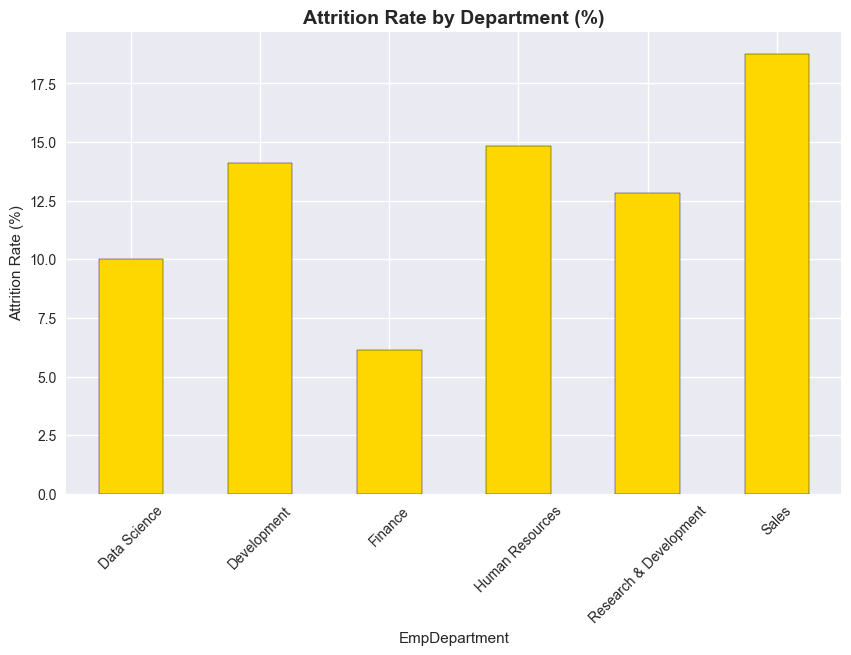

In [13]:
dept_attrition = df.groupby('EmpDepartment')['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100)
plt.figure(figsize=(10, 6))
dept_attrition.plot(kind='bar', color='gold', edgecolor='black')
plt.title('Attrition Rate by Department (%)', fontsize=14, fontweight='bold')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45)
plt.show()

#### Performance Distribution by Department

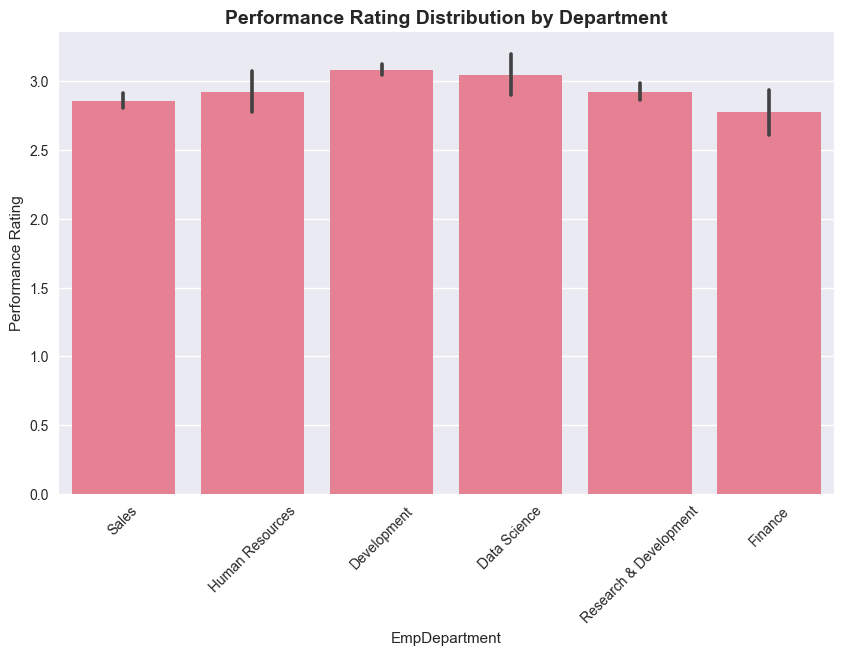

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='EmpDepartment', y='PerformanceRating')
plt.title('Performance Rating Distribution by Department', fontsize=14, fontweight='bold')
plt.ylabel('Performance Rating')
plt.xticks(rotation=45)
plt.show()

### Department-Wise Insights

- **Average Performance Rating by Department**:  
  All departments maintain similar ratings (~3.0), with Finance slightly lower than others.

- **Employee Count by Department**:  
  Sales, Development, and R&D have the largest workforce; Data Science has the fewest employees.

- **Attrition Rate by Department (%)**:  
  Sales faces the highest attrition (~18%), followed by R&D and Development.  
  Finance shows the lowest attrition (~6%), indicating better employee retention.

- **Performance Rating Distribution by Department**:  
  Ratings are mostly consistent (centered around 3.0) across departments,  
  but Finance shows higher variation — some employees rated as low as 2.0 and as high as 4.0.
